,Category,Baseline Mean (Std),Frequency Mean (Std)
0,Feeling (Last Hour),2.94 (0.75),3.06 (0.75)
1,Air Quality,3.24 (0.97),3.41 (1.0)
2,Temperature,3.35 (0.7),3.47 (0.51)
3,Air Humidity,2.88 (0.7),2.94 (0.66)
4,Air Movement,2.12 (0.86),2.18 (0.81)
5,Altitude,3.12 (1.22),3.12 (1.22)


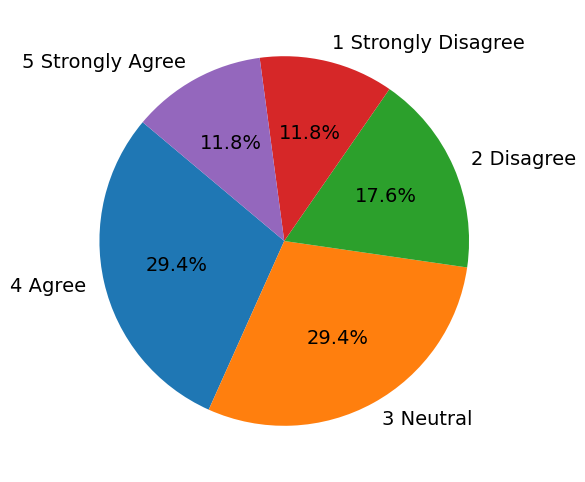

In [2]:
import pandas as pd

# Load the Excel file
file_path = "User_Feedback_Survey.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Cleaning column names
df.columns = df.columns.str.strip()

# Selecting relevant columns for computing means and standard deviations
baseline_columns = [
    "Baseline Round Feeling (Last Hour)", "Baseline Air Quality", 
    "Baseline Temperature", "Baseline Air Humidity", "Baseline Air Movement"
]

frequency_columns = [
    "Frequency Feeling (Last Hour)", "Frequency Air Quality", 
    "Frequency Temperature", "Frequency Air Humidity", "Frequency Air Movement"
]

altitude_column = "Altitude"  # Ensure this matches the actual column name

# Computing statistics for baseline, frequency, and overall altitude
baseline_stats = df[baseline_columns].describe().loc[['mean', 'std']]
frequency_stats = df[frequency_columns].describe().loc[['mean', 'std']]
altitude_stats = df[altitude_column].describe().loc[['mean', 'std']]

# Formatting as "mean (std)"
baseline_formatted = baseline_stats.loc['mean'].round(2).astype(str) + " (" + baseline_stats.loc['std'].round(2).astype(str) + ")"
frequency_formatted = frequency_stats.loc['mean'].round(2).astype(str) + " (" + frequency_stats.loc['std'].round(2).astype(str) + ")"
overall_altitude_formatted = f"{altitude_stats['mean']:.2f} ({altitude_stats['std']:.2f})"

# Defining categories
categories = [
    "Feeling (Last Hour)", "Air Quality", "Temperature", "Air Humidity", "Air Movement"
]

# Constructing the main DataFrame (excluding altitude for now)
summary_df = pd.DataFrame({
    "Category": categories,
    "Baseline Mean (Std)": list(baseline_formatted),
    "Frequency Mean (Std)": list(frequency_formatted)
})

# Adding the overall Altitude row
altitude_row = pd.DataFrame({
    "Category": ["Altitude"],
    "Baseline Mean (Std)": [overall_altitude_formatted],
    "Frequency Mean (Std)": [overall_altitude_formatted]
})

# Concatenating the corrected Altitude row to the summary DataFrame
summary_df = pd.concat([summary_df, altitude_row], ignore_index=True)



# Display results
display(summary_df)

import matplotlib.pyplot as plt
# Display results
# Mapping numerical values to descriptive labels
altitude_labels = {
    1: "1 Strongly Disagree",
    2: "2 Disagree",
    3: "3 Neutral",
    4: "4 Agree",
    5: "5 Strongly Agree"
}

# Replace numerical values in the altitude column with labels
altitude_counts = df[altitude_column].map(altitude_labels).value_counts()

# Plot the updated pie chart with descriptive labels
plt.figure(figsize=(8, 6))
plt.pie(altitude_counts, labels=altitude_counts.index, autopct='%1.1f%%', startangle=140,    textprops={'fontsize': 14} )
plt.show()

